In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 국민 여가활동

In [ ]:
KC_2021 = pd.read_csv('KC_MRFN_LSR_ACT_SURVEY_INFO_2021.csv')
KC_2022 = pd.read_csv('KC_MRFN_LSR_ACT_SURVEY_INFO_2022.csv')

In [ ]:
col_name = KC_2021.columns

In [ ]:
len(col_name)

61

In [ ]:
KC_col = ['TV시청','인터넷활동','연락활동','산책활동','게임활동','운동','음악듣기','반려동물활동','스포츠간접관람','독서활동',
          '쇼핑외식','낮잠','만화독서','등산활동','라디오듣기','신문잡지독서','목욕활동','골프활동','활동X','언어기술자격증취득활동',
          '영화관람','사이버스포츠관람','미술활동','도박복권구매','당구장활동','자전거활동','홈페이지주소','생활공예활동','사진촬영','동호회그룹',
          '자연명소관람','스포츠관람활동','전시관람','낚시활동','수집활동','노래방방문','필기독서토론활동','사회봉사활동','미용활동',
          '가족지인방문','전통예술학습활동','문화유적방문','테마파크방문','기타레저활동','박물관관람','국내캠핑활동','지역축제참가','그룹활동','전통예술공연관람','여행배탑승',
         '해외여행','문학행사참여']

In [ ]:
KC_2021_indi = KC_2021.iloc[:,9:].fillna(0)
KC_2022_indi = KC_2022.iloc[:,9:].fillna(0)
KC_2021_indi.columns = KC_col
KC_2022_indi.columns = KC_col

In [ ]:
KC_2021_indi = KC_2021_indi.mean().to_frame().T
KC_2021_indi.index = [2021]
KC_2022_indi = KC_2022_indi.mean().sort_values(ascending=False).to_frame().T
KC_2022_indi.index = [2022]

In [ ]:
idx = list(KC_2022_indi.columns)
KC_2021_indi = KC_2021_indi[idx]

In [ ]:
KC_2122 = pd.concat([KC_2021_indi, KC_2022_indi])
KC_2122

,TV시청,쇼핑외식,산책활동,연락활동,가족지인방문,낮잠,음악듣기,미용활동,인터넷활동,목욕활동,...,생활공예활동,여행배탑승,홈페이지주소,기타레저활동,해외여행,전통예술공연관람,문학행사참여,필기독서토론활동,수집활동,전통예술학습활동
2021,95.376471,87.070588,83.605882,86.994118,77.635294,65.894118,52.641176,52.864706,67.417647,46.252941,...,3.288235,1.364706,3.094118,6.082353,6.164706,0.717647,0.505882,1.194118,1.364706,0.300000
2022,91.117647,81.064706,80.335294,79.282353,68.958824,61.952941,53.035294,52.517647,51.705882,48.882353,...,3.611765,3.494118,3.405882,3.058824,2.047059,1.823529,1.782353,1.588235,1.441176,0.547059


In [ ]:
KC_2122 = KC_2122[KC_2122>10].dropna(axis=1)
KC_2122

,TV시청,쇼핑외식,산책활동,연락활동,가족지인방문,낮잠,음악듣기,미용활동,인터넷활동,목욕활동,...,문화유적방문,테마파크방문,독서활동,노래방방문,라디오듣기,국내캠핑활동,만화독서,반려동물활동,운동,신문잡지독서
2021,95.376471,87.070588,83.605882,86.994118,77.635294,65.894118,52.641176,52.864706,67.417647,46.252941,...,24.123529,10.417647,20.629412,11.276471,21.235294,19.652941,13.882353,11.435294,13.129412,10.400000
2022,91.117647,81.064706,80.335294,79.282353,68.958824,61.952941,53.035294,52.517647,51.705882,48.882353,...,26.611765,20.635294,20.411765,20.229412,20.188235,18.311765,16.364706,13.735294,13.305882,12.676471


In [ ]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3024\1969752946.py:3: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


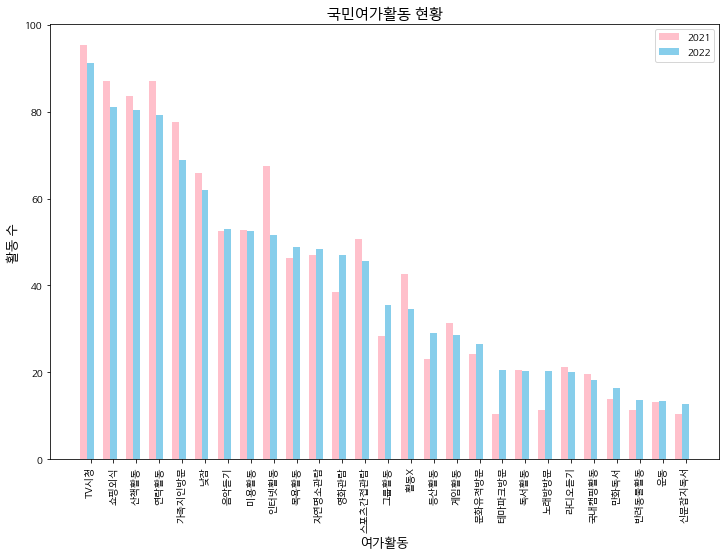

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
bar_width=0.3

index = np.arange(27)

b1 = plt.bar(index, KC_2122.loc[2021], bar_width, alpha=1, label='2021', color='pink')
b2 = plt.bar(index+bar_width, KC_2122.loc[2022], bar_width, alpha=1, label='2022', color='skyblue')

plt.xticks(np.arange(bar_width, 27+bar_width, 1), KC_2122.columns, rotation=90)
plt.title('국민여가활동 현황',fontsize=15)
plt.ylabel('활동 수',fontsize=13)
plt.xlabel('여가활동',fontsize=13)
plt.legend()
plt.show()